In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, recall_score, precision_score
import matplotlib.pyplot as plt

In [2]:
# Veriyi yükleme ve dataframe'e dönüştürme
dataset = pd.read_csv('diabetes-data.csv')

In [3]:
# İlk beş satırı gösterme
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Veriyi ayırma
X = dataset.drop(columns='Outcome', axis=1)
y = dataset['Outcome']

In [5]:
# Veriyi standartlaştırma
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [6]:
X = scaled_data
y = dataset['Outcome']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [7]:
# Modeli eğitme
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [8]:
# Eğitim verisi ile tahmin
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test verisi ile tahmin
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [9]:
# Değerlendirme metrikleri
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# ROC eğrisi için veri
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

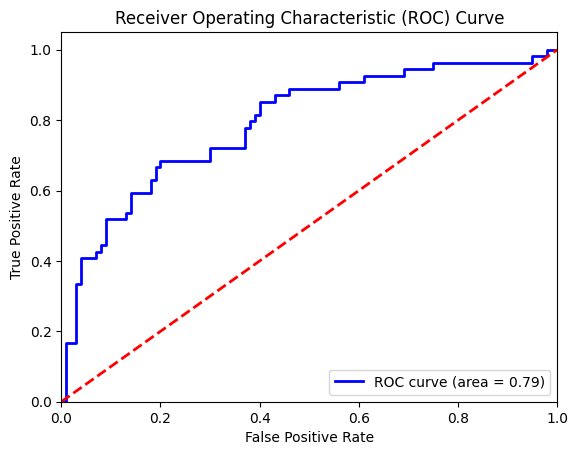

In [10]:
# ROC eğrisini çizme
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
# Sonuçları yazdırma
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)

Train Accuracy:  0.7866449511400652
Test Accuracy:  0.7727272727272727
F1 Score:  0.6153846153846154
Recall:  0.5185185185185185
ROC AUC:  0.7920370370370371


In [16]:
import warnings
warnings.filterwarnings('ignore')

# Örnek veri tahmini
sample_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)
# sample_data2 = (3, 150, 52, 1, 0, 33.0, 0.113, 25)
sample_data_numpy = np.asarray(sample_data)
sample_data_reshaped = sample_data_numpy.reshape(1, -1)
normalized_data = scaler.transform(sample_data_reshaped)

prediction = model.predict(normalized_data)
print('Result: ', 'Diabet' if prediction[0] == 1 else 'No diabet')

Result:  No diabet
